<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/5_SiPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Silicon Photomultipliers (SiPM)

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [2]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

rm: cannot remove './sample_data': No such file or directory
GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 1949, done.
remote: Counting objects: 100% (1949/1949), done.
remote: Compressing objects: 100% (1427/1427), done.
remote: Total 1949 (delta 1021), reused 1140 (delta 493), pack-reused 0
Receiving objects: 100% (1949/1949), 86.90 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (1021/1021), done.


### Install environment

In [3]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [4]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 3.5 MB/s 


## SiPM

### SiPM $1$ $mm^2$

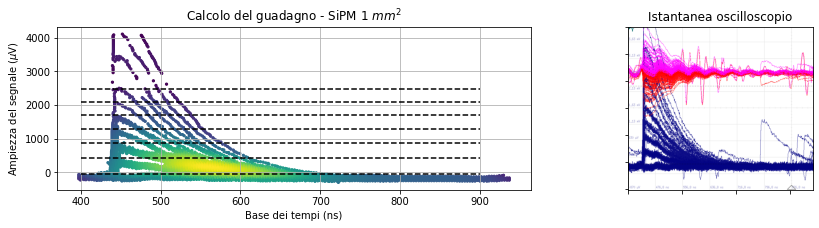

In [179]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN1Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})

tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 1 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

#---------------------
levels_1mm = [-40.31028, 431.64327, 881.150748, 1281.24983, 1695.97721, 2080.30269, 2481.52727]
tau1 = 1.11666196e-07 #280.712e-9  #s
#Da misure con cursori / vedere fit in fondo al notebook

for l in levels_1mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_gain_staircase.pdf")

### SiPM $3$ $mm^2$

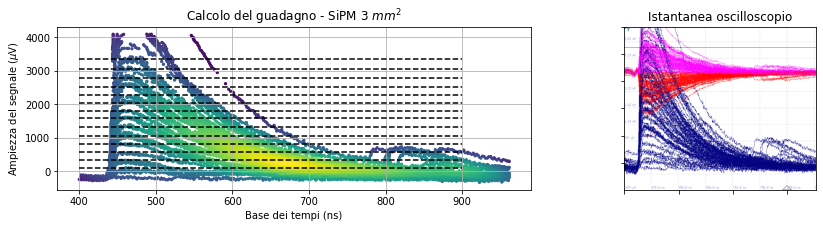

In [180]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN3Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})
tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 3 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

#---------------------
levels_3mm = [100.16667, 348.91667, 581.08333, 829.8333, 1062.000, 1335.625, 1600.9583, 1816.5417, 2048.7083, 2272.5833, 2513.0417, 2786.6667, 3068.5833, 3342.2083]
tau3 = 1.88148237e-07 #468.712e-9  #s
#Da misure con cursori / vedere fit in fondo al notebook

for l in levels_3mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_gain_staircase.pdf")

In [181]:
levels_1mm = np.array(levels_1mm)
levels_3mm = np.array(levels_3mm)
diff1mm = np.diff(levels_1mm)
diff3mm = np.diff(levels_3mm)
dm1     = diff1mm.mean()
dm3     = diff3mm.mean()
sdm1    = (diff1mm.max() - diff1mm.min()) / 2
sdm3    = (diff3mm.max() - diff3mm.min()) / 2
print("Distanza media 1x1mm^2 = ", dm1, " +/-  ", sdm1, " uV")
print("Distanza media 3x3mm^2 = ", dm3, " +/-  ", sdm3, " uV")

Distanza media 1x1mm^2 =  420.30625833333335  +/-   43.81403499999999  uV
Distanza media 3x3mm^2 =  249.38781769230766  +/-   33.16659999999979  uV


1 $mm^2$

In [182]:
vt = dm1 * 1e-6 * 0.5 * tau1
vte = vt / 50 
G1 = vte / 1.602e-19
print("Vt = ", vt)
print("G  = ", G1)
Gerr1 = 4e5 # Ancora da implementare...

Vt =  2.3467000511538314e-11
G  =  2929712.9227888035


3 $mm^2$

In [183]:
vt = dm3 * 1e-6 * 0.5 * tau3
vte = vt / 50 
G3 = vte / 1.602e-19
print("Vt = ", vt)
print("G  = ", G3)
Gerr3 = 4e5 #Ancora da implementare...

Vt =  2.3460939114042546e-11
G  =  2928956.194012802


Verifica compatibilità tra i due valori di guadagno e il datasheet

In [184]:
Gteo = 3.e6 #con +4 di overvolt
Z1 = (Gteo - G1) / Gerr1
Z3 = (Gteo - G3) / Gerr3
pvalue1 = sp.stats.norm.cdf(-abs(Z1)) *2 
pvalue3 = sp.stats.norm.cdf(-abs(Z3)) *2 
print("pVal 1 = ", pvalue1)
print("pVal 3 = ", pvalue3)

pVal 1 =  0.8605157345583794
pVal 3 =  0.8590296514942268


### SiPM $1$ $mm^2$ - Costante di tempo

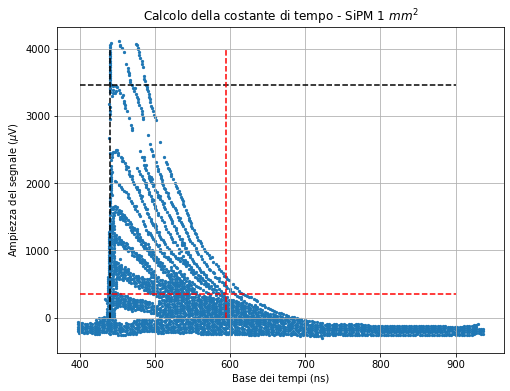

In [95]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 1 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3460
tauL = maxL / 10
tau0 = 440
tauV = 594.2

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_tau.pdf")

### SiPM $3$ $mm^2$ - Costante di tempo

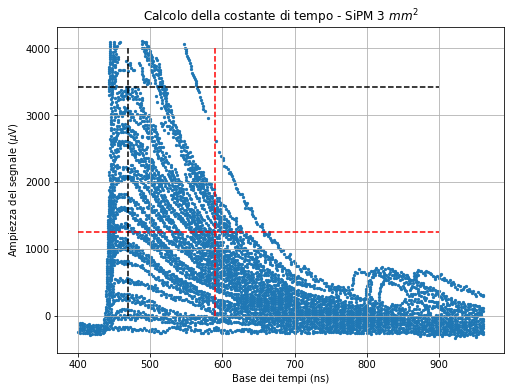

In [94]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 3 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3420
tauL = maxL / np.exp(1)
tau0 = 470
tauV = 590

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0

plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_tau.pdf")

### Saturazione SiPM $1$ $mm^2$

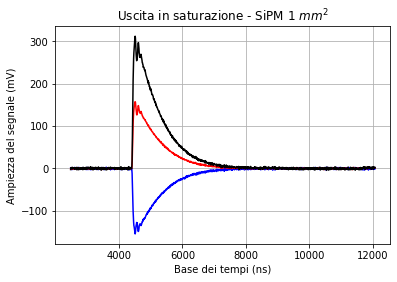

In [173]:
SiPM_1mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT1MM.CSV')
t  = SiPM_1mm_sat['in s'].to_numpy()
C1 = SiPM_1mm_sat['C1 in V'].to_numpy()
C2 = SiPM_1mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 1 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_1mm.pdf")

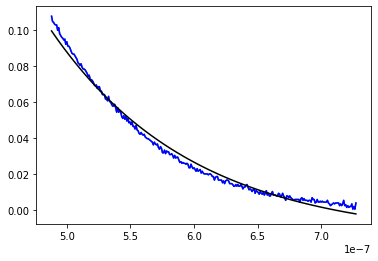

fitted parameters: [ 1.11666196e-07  3.70859079e+00  9.99924333e-08 -1.54084652e-02]


In [177]:
i = 300
o = 600
plt.plot(t[i:o], C2[i:o]) 

from scipy.optimize import curve_fit

xData = t[i:o]
yData = C2[i:o]

def standardFunc(data, tau, Vo, phi, a):
    return Vo * np.exp(-(data-phi) / tau) + a


# some initial parameter values - must be within bounds
initialParameters = np.array([6e-9, 0.1, 0., 0.])

# bounds on parameters - initial parameters must be within these
lowerBounds = (5e-9, -5., -1e-7, -5)
upperBounds = (500e-9, 5., 1e-7, 5)
parameterBounds = [lowerBounds, upperBounds]

fittedParameters, pcov = curve_fit(standardFunc, xData, yData, initialParameters, bounds = parameterBounds)

# values for display of fitted function
tau, Vo, phi, a = fittedParameters

# for plotting the fitting results
xPlotData = np.linspace(min(xData), max(xData), 50)
y_plot = standardFunc(xPlotData, tau, Vo, phi, a)

plt.plot(xData, yData, color="blue") # plot the raw data as a scatterplot
plt.plot(xPlotData, y_plot, color="Black") # plot the equation using the fitted parameters
plt.show()

print('fitted parameters:', fittedParameters)

### Saturazione SiPM $3$ $mm^2$

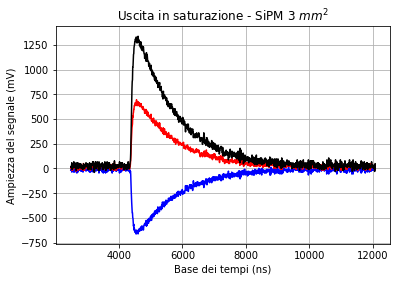

In [167]:
SiPM_3mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT3MM.CSV')
t  = SiPM_3mm_sat['in s'].to_numpy()
C1 = SiPM_3mm_sat['C1 in V'].to_numpy()
C2 = SiPM_3mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 3 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_3mm.pdf")

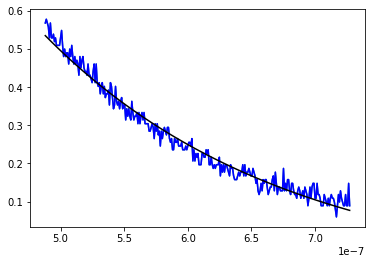

fitted parameters: [ 1.88148237e-07  5.00000000e+00  1.00000000e-07 -1.01375207e-01]


In [172]:
i = 300
o = 600
plt.plot(t[i:o], C2[i:o]) 

from scipy.optimize import curve_fit

xData = t[i:o]
yData = C2[i:o]

def standardFunc(data, tau, Vo, phi, a):
    return Vo * np.exp(-(data-phi) / tau) + a


# some initial parameter values - must be within bounds
initialParameters = np.array([10e-9, 0.1, 0., 0.])

# bounds on parameters - initial parameters must be within these
lowerBounds = (5e-9, -5., -1e-7, -5)
upperBounds = (500e-9, 5., 1e-7, 5)
parameterBounds = [lowerBounds, upperBounds]

fittedParameters, pcov = curve_fit(standardFunc, xData, yData, initialParameters, bounds = parameterBounds)

# values for display of fitted function
tau, Vo, phi, a = fittedParameters

# for plotting the fitting results
xPlotData = np.linspace(min(xData), max(xData), 50)
y_plot = standardFunc(xPlotData, tau, Vo, phi, a)

plt.plot(xData, yData, color = "blue") # plot the raw data as a scatterplot
plt.plot(xPlotData, y_plot, color = "black") # plot the equation using the fitted parameters
plt.show()

print('fitted parameters:', fittedParameters)

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 

/content/Electronics-2021-UNITO
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/valeriopagliarino/Electronics-2021-UNITO
   5b04533..07b4fbd  main       -> origin/main
Updating 5b04533..07b4fbd
Fast-forward
 lab-reports/analog.tex | 31 +++++++++++++++++++++++++++++--
 1 file changed, 29 insertions(+), 2 deletions(-)
[main 79327d2] Plots from data analysis
 2 files changed, 0 insertions(+), 0 deletions(-)
 rewrite analysis/output/SiPM_1mm_gain_staircase.pdf (86%)
 rewrite analysis/output/SiPM_3mm_gain_staircase.pdf (90%)
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 209.87 KiB | 17.49 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local o